In [4]:
# Imports
import numpy as np
import os
from utilities import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

os.environ["CUDA_VISIBLE_DEVICES"]="2"

%matplotlib inline

In [5]:
import pandas as pd 
import os

#def read_data(data_path, split = "train"):
def read_data(data_path, split):
	""" Read data """

	# Fixed params
	n_class = 6
	n_steps = 128

	# Paths
	path_ = os.path.join(data_path, split)
	print ('path is', path_)
	path_signals = os.path.join(path_, "Inertial Signals")
	print ('path_signals = ', path_signals)

	# Read labels and one-hot encode
	label_path = os.path.join(path_, "y_" + split + ".txt")
	labels = pd.read_csv(label_path, header = None)

	# Read time-series data
	channel_files = os.listdir(path_signals)
	print('channel_files =', channel_files)
	channel_files.sort()
	n_channels = len(channel_files)
	posix = len(split) + 5

	# Initiate array
	list_of_channels = []
	X = np.zeros((len(labels), n_steps, n_channels))
	i_ch = 0
	for fil_ch in channel_files:
		channel_name = fil_ch[:-posix]
		print (fil_ch)
		#print (channel_files)
		dat_ = pd.read_csv(os.path.join(path_signals,fil_ch), delim_whitespace = True, header = None)
		#if (fil_ch == 1):
			#print('type is', type(dat_))     
			#print(dat_)
		#dat_ = np.load(os.path.join(path_signals,fil_ch), delim_whitespace = True, header = None)
		X[:,:,i_ch] = dat_.as_matrix()

		# Record names
		list_of_channels.append(channel_name)

		# iterate
		i_ch += 1
        
	print('type is', type(dat_))     
	print(dat_)
    
	# Return 
	return X, labels[0].values, list_of_channels


def standardize(train, test):
	""" Standardize data """

	# Standardize train and test
	X_train = (train - np.mean(train, axis=0)[None,:,:]) / np.std(train, axis=0)[None,:,:]
	X_test = (test - np.mean(test, axis=0)[None,:,:]) / np.std(test, axis=0)[None,:,:]

	return X_train, X_test

def one_hot(labels, n_class = 6):
	""" One-hot encoding """
	expansion = np.eye(n_class)
	y = expansion[:, labels-1].T
	assert y.shape[1] == n_class, "Wrong number of labels!"

	return y

def get_batches(X, y, batch_size = 100):
	""" Return a generator for batches """
	n_batches = len(X) // batch_size
	X, y = X[:n_batches*batch_size], y[:n_batches*batch_size]

	# Loop over batches and yield
	for b in range(0, len(X), batch_size):
		yield X[b:b+batch_size], y[b:b+batch_size]
	

In [7]:
read_data(data_path="/home/siddiqmk/Tutorials/UCI HAR Dataset/", split="train")


path is /home/siddiqmk/Tutorials/UCI HAR Dataset/train
path_signals =  /home/siddiqmk/Tutorials/UCI HAR Dataset/train/Inertial Signals
channel_files = ['total_acc_z_train.txt', 'total_acc_y_train.txt', 'body_acc_z_train.txt', 'body_gyro_x_train.txt', 'body_gyro_z_train.txt', 'body_acc_y_train.txt', 'body_gyro_y_train.txt', 'body_acc_x_train.txt', 'total_acc_x_train.txt']
body_acc_x_train.txt
body_acc_y_train.txt


<ipython-input-5-5c03a9cb3145>:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X[:,:,i_ch] = dat_.as_matrix()


body_acc_z_train.txt
body_gyro_x_train.txt
body_gyro_y_train.txt
body_gyro_z_train.txt
total_acc_x_train.txt
total_acc_y_train.txt
total_acc_z_train.txt
type is <class 'pandas.core.frame.DataFrame'>
           0         1         2         3         4         5         6    \
0     0.102934  0.105687  0.102102  0.106553  0.102814  0.107493  0.109386   
1     0.097930  0.099351  0.098114  0.097517  0.097472  0.096577  0.097741   
2     0.091117  0.092676  0.096064  0.099897  0.097627  0.088291  0.082241   
3     0.095152  0.095415  0.088274  0.086325  0.088411  0.088929  0.091691   
4     0.080841  0.079127  0.078291  0.084063  0.089450  0.089304  0.090460   
...        ...       ...       ...       ...       ...       ...       ...   
7347  0.309481  0.221350  0.164826  0.159053  0.112532  0.029263  0.074362   
7348  0.209530  0.202381  0.223397  0.211685  0.205776  0.162612 -0.014738   
7349  0.174587  0.232424  0.257607  0.294643  0.351963  0.385571  0.401494   
7350  0.262814  0.295

(array([[[ 1.808515e-04,  1.076681e-02,  5.556068e-02, ...,
           1.012817e+00, -1.232167e-01,  1.029341e-01],
         [ 1.013856e-02,  6.579480e-03,  5.512483e-02, ...,
           1.022833e+00, -1.268756e-01,  1.056872e-01],
         [ 9.275574e-03,  8.928878e-03,  4.840473e-02, ...,
           1.022028e+00, -1.240037e-01,  1.021025e-01],
         ...,
         [-1.147484e-03,  1.714439e-04,  2.647864e-03, ...,
           1.018445e+00, -1.240696e-01,  1.003852e-01],
         [-2.222655e-04,  1.574181e-03,  2.381057e-03, ...,
           1.019372e+00, -1.227451e-01,  9.987355e-02],
         [ 1.575500e-03,  3.070189e-03, -2.269757e-03, ...,
           1.021171e+00, -1.213260e-01,  9.498741e-02]],
 
        [[ 1.093752e-03, -4.687588e-03, -2.685954e-02, ...,
           1.018851e+00, -1.239760e-01,  9.792958e-02],
         [ 4.550077e-03, -7.487894e-03, -2.509841e-02, ...,
           1.022380e+00, -1.268078e-01,  9.935086e-02],
         [ 2.879173e-03, -8.429991e-03, -2.597534e-02, 

In [8]:
read_data(data_path="/home/siddiqmk/Tutorials/UCI HAR Dataset/", split="test")

path is /home/siddiqmk/Tutorials/UCI HAR Dataset/test
path_signals =  /home/siddiqmk/Tutorials/UCI HAR Dataset/test/Inertial Signals
channel_files = ['total_acc_y_test.txt', 'body_gyro_y_test.txt', 'body_gyro_z_test.txt', 'total_acc_x_test.txt', 'body_acc_x_test.txt', 'body_gyro_x_test.txt', 'body_acc_z_test.txt', 'total_acc_z_test.txt', 'body_acc_y_test.txt']
body_acc_x_test.txt
body_acc_y_test.txt
body_acc_z_test.txt


<ipython-input-5-5c03a9cb3145>:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X[:,:,i_ch] = dat_.as_matrix()


body_gyro_x_test.txt
body_gyro_y_test.txt
body_gyro_z_test.txt
total_acc_x_test.txt
total_acc_y_test.txt
total_acc_z_test.txt
type is <class 'pandas.core.frame.DataFrame'>
           0         1         2         3         4         5         6    \
0     0.023780  0.076293  0.147475  0.139906  0.119934  0.134195  0.133364   
1     0.125616  0.125625  0.116381  0.107567  0.115386  0.123665  0.125667   
2     0.150774  0.153943  0.144154  0.132821  0.136878  0.140348  0.135400   
3     0.111199  0.115503  0.135251  0.160527  0.161445  0.144401  0.137865   
4     0.133833  0.138512  0.139431  0.137851  0.136215  0.132964  0.129529   
...        ...       ...       ...       ...       ...       ...       ...   
2942 -0.247392 -0.243601 -0.292436 -0.395898 -0.421831 -0.376531 -0.393286   
2943 -0.275710 -0.258489 -0.224109 -0.199280 -0.221270 -0.266509 -0.303976   
2944 -0.221693 -0.204556 -0.256872 -0.284703 -0.326061 -0.332495 -0.287243   
2945 -0.394082 -0.315110 -0.213904 -0.182951 -0.

(array([[[ 1.165315e-02, -2.939904e-02,  1.068262e-01, ...,
           1.041216e+00, -2.697959e-01,  2.377977e-02],
         [ 1.310909e-02, -3.972867e-02,  1.524549e-01, ...,
           1.041803e+00, -2.800250e-01,  7.629271e-02],
         [ 1.126885e-02, -5.240586e-02,  2.168462e-01, ...,
           1.039086e+00, -2.926631e-01,  1.474754e-01],
         ...,
         [ 1.291511e-03,  1.173502e-02,  3.665587e-03, ...,
           9.930164e-01, -2.599865e-01,  1.443951e-01],
         [ 1.469997e-03,  9.517414e-03,  4.041945e-03, ...,
           9.932414e-01, -2.620643e-01,  1.447033e-01],
         [ 2.573841e-03,  7.305069e-03,  4.888436e-03, ...,
           9.943906e-01, -2.641348e-01,  1.454939e-01]],
 
        [[ 9.279629e-03,  6.650520e-03, -2.631933e-02, ...,
           9.991921e-01, -2.649349e-01,  1.256164e-01],
         [ 4.929711e-03,  1.864973e-02, -2.688753e-02, ...,
           9.946787e-01, -2.532142e-01,  1.256249e-01],
         [ 3.953596e-03,  1.553950e-02, -3.663861e-02, 

In [9]:
# 각자의 데이터 경로로 수정 
X_train, labels_train, list_ch_train = read_data(data_path="/home/siddiqmk/Tutorials/UCI HAR Dataset/", split="train") # train
X_test, labels_test, list_ch_test = read_data(data_path="/home/siddiqmk/Tutorials/UCI HAR Dataset/", split="test") # test

assert list_ch_train == list_ch_test, "Mistmatch in channels!"

path is /home/siddiqmk/Tutorials/UCI HAR Dataset/train
path_signals =  /home/siddiqmk/Tutorials/UCI HAR Dataset/train/Inertial Signals
channel_files = ['total_acc_z_train.txt', 'total_acc_y_train.txt', 'body_acc_z_train.txt', 'body_gyro_x_train.txt', 'body_gyro_z_train.txt', 'body_acc_y_train.txt', 'body_gyro_y_train.txt', 'body_acc_x_train.txt', 'total_acc_x_train.txt']
body_acc_x_train.txt
body_acc_y_train.txt


<ipython-input-5-5c03a9cb3145>:43: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X[:,:,i_ch] = dat_.as_matrix()


body_acc_z_train.txt
body_gyro_x_train.txt
body_gyro_y_train.txt
body_gyro_z_train.txt
total_acc_x_train.txt
total_acc_y_train.txt
total_acc_z_train.txt
type is <class 'pandas.core.frame.DataFrame'>
           0         1         2         3         4         5         6    \
0     0.102934  0.105687  0.102102  0.106553  0.102814  0.107493  0.109386   
1     0.097930  0.099351  0.098114  0.097517  0.097472  0.096577  0.097741   
2     0.091117  0.092676  0.096064  0.099897  0.097627  0.088291  0.082241   
3     0.095152  0.095415  0.088274  0.086325  0.088411  0.088929  0.091691   
4     0.080841  0.079127  0.078291  0.084063  0.089450  0.089304  0.090460   
...        ...       ...       ...       ...       ...       ...       ...   
7347  0.309481  0.221350  0.164826  0.159053  0.112532  0.029263  0.074362   
7348  0.209530  0.202381  0.223397  0.211685  0.205776  0.162612 -0.014738   
7349  0.174587  0.232424  0.257607  0.294643  0.351963  0.385571  0.401494   
7350  0.262814  0.295

In [10]:
# Normalize?
X_train, X_test = standardize(X_train, X_test)

In [11]:
# creating test, validation & training split 

X_tr, X_vld, lab_tr, lab_vld = train_test_split(X_train, labels_train, 
                                                stratify = labels_train, random_state = 123)

In [12]:
y_tr = one_hot(lab_tr)
y_vld = one_hot(lab_vld)
y_test = one_hot(labels_test)

In [13]:
# Imports
import tensorflow.compat.v1 as tf

In [14]:
batch_size = 600       # Batch size
seq_len = 128          # Number of steps
learning_rate = 0.0001
epochs = 1000

n_classes = 6
n_channels = 9

As in many CNN architectures, the deeper the layers get, the higher the number of filters become.

In [15]:
class  New_CNN:

    def __init__(self, name):
        self.name = name

    def __call__(self, X, reuse=False):

        with tf.variable_scope(self.name) as scope:

            if reuse:
                scope.reuse_variables()

            with tf.variable_scope('layer0'):
                X_img = X

            # Convolutional Layer #1 
            with tf.variable_scope('layer1'):
                # (batch, 128, 9) --> (batch, 128, 18)
                conv1 = tf.layers.conv1d(inputs=X_img, filters=18, kernel_size=2,
                                         padding='same', activation = tf.nn.relu, use_bias=False)

            # Convolutional Layer #2 
            with tf.variable_scope('layer2'):
                # (batch, 64, 18) --> (batch, 128, 36)
                conv2 = tf.layers.conv1d(inputs=conv1, filters=36, kernel_size=2,  
                                         padding='same', activation = tf.nn.relu, use_bias=False)

            # Convolutional Layer #3 
            with tf.variable_scope('layer3'):
                # (batch, 32, 36) --> (batch, 128, 72)
                conv3 = tf.layers.conv1d(inputs=conv2, filters=72, kernel_size=2, 
                                         padding='same', activation = tf.nn.relu, use_bias=False)


            # Dense Layer with Relu
            with tf.variable_scope('layer4'):
                # (batch, 16, 72) --> (batch, 128, 144)
                conv4 = tf.layers.conv1d(inputs=conv3, filters=144, kernel_size=2, 
                                         padding='same', activation = tf.nn.relu, use_bias=False)

            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            with tf.variable_scope('layer5'):
                # Flatten and add dropout
                flat = tf.reshape(conv4, (-1, 128*144))
    
                # Predictions
                logits = tf.layers.dense(flat, n_classes, use_bias=False)
                prediction = tf.nn.softmax(logits)

        return [X_img, conv1, conv2, conv3,conv4, flat, prediction], logits
    
    @property
    def vars(self):
        return tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=self.name)
    
    
    

In [16]:
graph = tf.Graph()

# Construct placeholders
with graph.as_default():
    
    new_CNN = New_CNN('CNN')
    
    inputs_ = tf.placeholder(tf.float32, [None, seq_len, n_channels], name = 'inputs')
    labels_ = tf.placeholder(tf.float32, [None, n_classes], name = 'labels')
    keep_prob_ = tf.placeholder(tf.float32, name = 'keep')
    learning_rate_ = tf.placeholder(tf.float32, name = 'learning_rate')

In [17]:
with graph.as_default():
    
    activations, logits = new_CNN(inputs_)
    
    tf.add_to_collection('DTD', inputs_)
    
    for activation in activations:
        tf.add_to_collection('DTD', activation)
    
    # Cost function and optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_))
    optimizer = tf.train.AdamOptimizer(learning_rate_).minimize(cost)
    
    # Accuracy
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

Instructions for updating:
Use `tf.keras.layers.Conv1D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [18]:
if (os.path.exists('checkpoints-cnn') == False):
    !mkdir checkpoints-cnn

In [20]:
validation_acc = []
validation_loss = []

train_acc = []
train_loss = []

with graph.as_default():
    saver = tf.train.Saver()

config = tf.ConfigProto()
config.gpu_options.allow_growth = True    
    
with tf.Session(config=config,graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    iteration = 1
   
    # Loop over epochs
    for e in range(epochs):
        
        # Loop over batches
        for x,y in get_batches(X_tr, y_tr, batch_size):
            
            # Feed dictionary
            feed = {inputs_ : x, labels_ : y, keep_prob_ : 0.5, learning_rate_ : learning_rate}
            
            # Loss
            loss, _ , acc = sess.run([cost, optimizer, accuracy], feed_dict = feed)
            train_acc.append(acc)
            train_loss.append(loss)
            
            # Print at each 5 iters
            if (iteration % 100 == 0):
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {:d}".format(iteration),
                      "Train loss: {:6f}".format(loss),
                      "Train acc: {:.6f}".format(acc))
            
            # Compute validation loss at every 10 iterations
            if (iteration%100 == 0):                
                val_acc_ = []
                val_loss_ = []
                
                for x_v, y_v in get_batches(X_vld, y_vld, batch_size):
                    # Feed
                    feed = {inputs_ : x_v, labels_ : y_v, keep_prob_ : 1.0}  
                    
                    # Loss
                    loss_v, acc_v = sess.run([cost, accuracy], feed_dict = feed)                    
                    val_acc_.append(acc_v)
                    val_loss_.append(loss_v)
                
                # Print info
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {:d}".format(iteration),
                      "Validation loss: {:6f}".format(np.mean(val_loss_)),
                      "Validation acc: {:.6f}".format(np.mean(val_acc_)))
                
                # Store
                validation_acc.append(np.mean(val_acc_))
                validation_loss.append(np.mean(val_loss_))
            
            # Iterate 
            iteration += 1
    
    saver.save(sess,"checkpoints-cnn/har.ckpt")

Epoch: 11/1000 Iteration: 100 Train loss: 0.557750 Train acc: 0.846667
Epoch: 11/1000 Iteration: 100 Validation loss: 0.590896 Validation acc: 0.843889
Epoch: 22/1000 Iteration: 200 Train loss: 0.206766 Train acc: 0.948333
Epoch: 22/1000 Iteration: 200 Validation loss: 0.222554 Validation acc: 0.931111
Epoch: 33/1000 Iteration: 300 Train loss: 0.158509 Train acc: 0.938333
Epoch: 33/1000 Iteration: 300 Validation loss: 0.165294 Validation acc: 0.937778
Epoch: 44/1000 Iteration: 400 Train loss: 0.131792 Train acc: 0.945000
Epoch: 44/1000 Iteration: 400 Validation loss: 0.144019 Validation acc: 0.944444
Epoch: 55/1000 Iteration: 500 Train loss: 0.112445 Train acc: 0.961667
Epoch: 55/1000 Iteration: 500 Validation loss: 0.131335 Validation acc: 0.947222
Epoch: 66/1000 Iteration: 600 Train loss: 0.086464 Train acc: 0.965000
Epoch: 66/1000 Iteration: 600 Validation loss: 0.121481 Validation acc: 0.951111
Epoch: 77/1000 Iteration: 700 Train loss: 0.082473 Train acc: 0.971667
Epoch: 77/1000 It

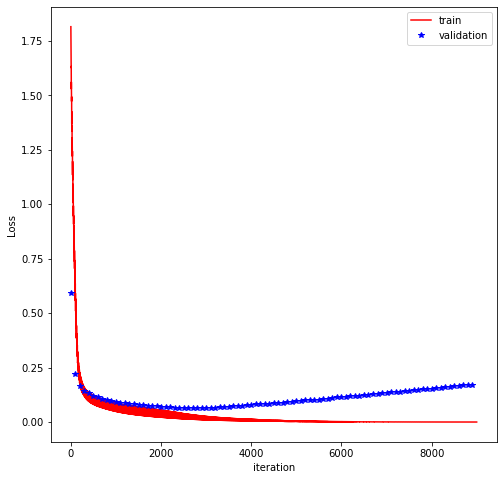

In [21]:
# Plot training and test loss
t = np.arange(iteration-1)

plt.figure(figsize = (8,8))
plt.plot(t, np.array(train_loss), 'r-')
plt.plot(t[t % 100 == 0], np.array(validation_loss), 'b*')
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

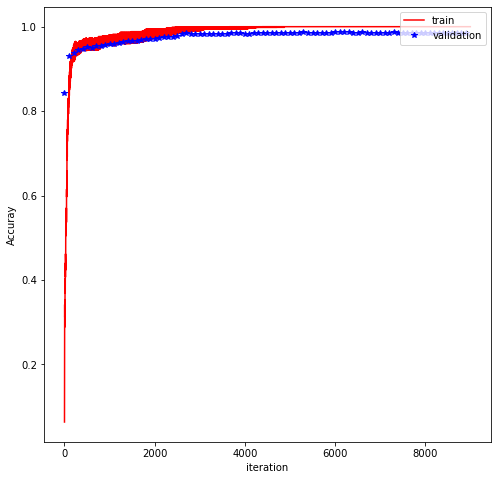

In [22]:
# Plot Accuracies
plt.figure(figsize = (8,8))

plt.plot(t, np.array(train_acc), 'r-', t[t % 100 == 0], validation_acc, 'b*')
plt.xlabel("iteration")
plt.ylabel("Accuray")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [23]:
test_acc = []

#         config = tf.ConfigProto(device_count={'GPU': 0})
config = tf.ConfigProto()
#         config.gpu_options.visible_device_list= '0' #only see the gpu 1
config.gpu_options.allow_growth = True   
with tf.Session(config=config,graph=graph) as sess:
    # Restore
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints-cnn'))
    
    for x_t, y_t in get_batches(X_test, y_test, batch_size):
        feed = {inputs_: x_t,
                labels_: y_t,
                keep_prob_: 1}
        
        batch_acc = sess.run(accuracy, feed_dict=feed)
        test_acc.append(batch_acc)
    print("Test accuracy: {:.6f}".format(np.mean(test_acc)))

INFO:tensorflow:Restoring parameters from checkpoints-cnn/har.ckpt
Test accuracy: 0.859167


In [24]:
tf.compat.v1.disable_eager_execution()
tf.reset_default_graph()
#         config = tf.ConfigProto(device_count={'GPU': 0})
config = tf.ConfigProto()
#         config.gpu_options.visible_device_list= '0' #only see the gpu 1
config.gpu_options.allow_growth = True   
sess = tf.InteractiveSession(config=config)

new_saver = tf.train.import_meta_graph('checkpoints-cnn/har.ckpt.meta')
new_saver.restore(sess, tf.train.latest_checkpoint('./checkpoints-cnn'))
# weights = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*kernel.*')
# biases = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*bias.*')

weights = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*kernel.*')
activations = tf.get_collection('DTD')
X = activations[0]

INFO:tensorflow:Restoring parameters from ./checkpoints-cnn/har.ckpt


In [25]:
X

<tf.Tensor 'inputs:0' shape=(None, 128, 9) dtype=float32>

In [26]:
activations

[<tf.Tensor 'inputs:0' shape=(None, 128, 9) dtype=float32>,
 <tf.Tensor 'inputs:0' shape=(None, 128, 9) dtype=float32>,
 <tf.Tensor 'CNN/layer1/conv1d/Relu:0' shape=(None, 128, 18) dtype=float32>,
 <tf.Tensor 'CNN/layer2/conv1d/Relu:0' shape=(None, 128, 36) dtype=float32>,
 <tf.Tensor 'CNN/layer3/conv1d/Relu:0' shape=(None, 128, 72) dtype=float32>,
 <tf.Tensor 'CNN/layer4/conv1d/Relu:0' shape=(None, 128, 144) dtype=float32>,
 <tf.Tensor 'CNN/layer5/Reshape:0' shape=(None, 18432) dtype=float32>,
 <tf.Tensor 'CNN/layer5/Softmax:0' shape=(None, 6) dtype=float32>]

In [77]:
weights

[<tf.Variable 'CNN/layer5/dense/kernel:0' shape=(18432, 6) dtype=float32>,
 <tf.Variable 'CNN/layer4/conv1d/kernel:0' shape=(2, 72, 144) dtype=float32>,
 <tf.Variable 'CNN/layer3/conv1d/kernel:0' shape=(2, 36, 72) dtype=float32>,
 <tf.Variable 'CNN/layer2/conv1d/kernel:0' shape=(2, 18, 36) dtype=float32>,
 <tf.Variable 'CNN/layer1/conv1d/kernel:0' shape=(2, 9, 18) dtype=float32>]

In [98]:
from tensorflow.python.ops import nn_ops, gen_nn_ops
from tensorflow.python.layers import pooling
class Taylor:

    def __init__(self, activations, weights, conv_ksize, pool_ksize, conv_strides, pool_strides, name):

        self.last_ind = len(activations)
        for op in activations[::-1]:
            self.last_ind -= 1
            if any([word in op.name for word in ['conv', 'pooling', 'dense']]):
                break

        self.activations = activations
        self.weights = weights
        self.conv_ksize = conv_ksize
        self.pool_ksize = pool_ksize
        self.conv_strides = conv_strides
        self.pool_strides = pool_strides
        self.name = name
    
    def __call__(self, logit):
        with tf.name_scope(self.name):
            Rs = []
            j = 0

            for i in range(len(self.activations) - 2):

                if i is self.last_ind:

                    if 'conv' in self.activations[i].name.lower():
                        Rs.append(self.backprop_conv_input(self.activations[i + 1], self.weights[j], Rs[-1], self.conv_strides))
                    else:
                        Rs.append(self.backprop_dense_input(self.activations[i + 1], self.weights[j], Rs[-1]))

                    continue

                if i == 0:
                    Rs.append(self.activations[i][:,logit,None])
                    Rs.append(self.backprop_dense(self.activations[i + 1], self.weights[j][:,logit,None], Rs[-1]))
                    j += 1

                    continue

                elif 'dense' in self.activations[i].name.lower():
                    Rs.append(self.backprop_dense(self.activations[i + 1], self.weights[j], Rs[-1]))
                    j += 1
                elif 'reshape' in self.activations[i].name.lower():
                    shape = self.activations[i + 1].get_shape().as_list()
                    shape[0] = -1
                    Rs.append(tf.reshape(Rs[-1], shape))
                elif 'conv' in self.activations[i].name.lower():
                    Rs.append(self.backprop_conv(self.activations[i + 1], self.weights[j], Rs[-1], self.conv_strides))
                    j += 1
                else:
                    raise Error('Unknown operation.')

            return Rs[-1]

    def backprop_conv(self, activation, kernel, relevance, strides, padding='SAME'):
        W_p = tf.maximum(0., kernel)
        z = nn_ops.conv1d(activation, W_p, strides, padding) + 1e-10
        s = relevance / z
        print(tf.shape(s))
        c = nn_ops.conv1d_transpose(s, W_p, tf.shape(activation), strides, padding)
        return activation * c

    def backprop_dense(self, activation, kernel, relevance):
        W_p = tf.maximum(0., kernel)
        z = tf.matmul(activation, W_p) + 1e-10
        s = relevance / z
        c = tf.matmul(s, tf.transpose(W_p))
        return activation * c

    def backprop_conv_input(self, X, kernel, relevance, strides, padding='SAME', lowest=0., highest=1.):
        W_p = tf.maximum(0., kernel)
        W_n = tf.minimum(0., kernel)

        L = tf.ones_like(X, tf.float32) * lowest
        H = tf.ones_like(X, tf.float32) * highest

        z_o = nn_ops.conv1d(X, kernel, strides, padding)
        z_p = nn_ops.conv1d(L, W_p, strides, padding)
        z_n = nn_ops.conv1d(H, W_n, strides, padding)

        z = z_o - z_p - z_n + 1e-10
        s = relevance / z

        c_o = nn_ops.conv1d_transpose(s, kernel, tf.shape(X), strides, padding)
        c_p = nn_ops.conv1d_transpose(s, W_p, tf.shape(X), strides, padding)
        c_n = nn_ops.conv1d_transpose(s, W_n, tf.shape(X), strides, padding)

        return X * c_o - L * c_p - H * c_n

    def backprop_dense_input(self, X, kernel, relevance, lowest=0., highest=1.):
        W_p = tf.maximum(0., kernel)
        W_n = tf.minimum(0., kernel)

        L = tf.ones_like(X, tf.float32) * lowest
        H = tf.ones_like(X, tf.float32) * highest

        z_o = tf.matmul(X, kernel)
        z_p = tf.matmul(L, W_p)
        z_n = tf.matmul(H, W_n)

        z = z_o - z_p - z_n + 1e-10
        s = relevance / z

        c_o = tf.matmul(s, tf.transpose(kernel))
        c_p = tf.matmul(s, tf.transpose(W_p))
        c_n = tf.matmul(s, tf.transpose(W_n))

        return X * c_o - L * c_p - H * c_n

In [101]:
conv_ksize = 2
pool_ksize = 2
conv_strides = 1
pool_strides = 2

weights.reverse()
activations.reverse()

In [102]:
weights

[<tf.Variable 'CNN/layer5/dense/kernel:0' shape=(18432, 6) dtype=float32>,
 <tf.Variable 'CNN/layer4/conv1d/kernel:0' shape=(2, 72, 144) dtype=float32>,
 <tf.Variable 'CNN/layer3/conv1d/kernel:0' shape=(2, 36, 72) dtype=float32>,
 <tf.Variable 'CNN/layer2/conv1d/kernel:0' shape=(2, 18, 36) dtype=float32>,
 <tf.Variable 'CNN/layer1/conv1d/kernel:0' shape=(2, 9, 18) dtype=float32>]

In [104]:
taylor = Taylor(activations, weights, conv_ksize, pool_ksize, conv_strides, pool_strides, 'Taylor')


<class '__main__.Taylor'>


In [108]:
Rs = []
for i in range(6):
    Rs.append(taylor(i))

Tensor("Taylor_24/Shape:0", shape=(3,), dtype=int32)
Tensor("Taylor_24/Shape_2:0", shape=(3,), dtype=int32)
Tensor("Taylor_24/Shape_4:0", shape=(3,), dtype=int32)
Tensor("Taylor_25/Shape:0", shape=(3,), dtype=int32)
Tensor("Taylor_25/Shape_2:0", shape=(3,), dtype=int32)
Tensor("Taylor_25/Shape_4:0", shape=(3,), dtype=int32)
Tensor("Taylor_26/Shape:0", shape=(3,), dtype=int32)
Tensor("Taylor_26/Shape_2:0", shape=(3,), dtype=int32)
Tensor("Taylor_26/Shape_4:0", shape=(3,), dtype=int32)
Tensor("Taylor_27/Shape:0", shape=(3,), dtype=int32)
Tensor("Taylor_27/Shape_2:0", shape=(3,), dtype=int32)
Tensor("Taylor_27/Shape_4:0", shape=(3,), dtype=int32)
Tensor("Taylor_28/Shape:0", shape=(3,), dtype=int32)
Tensor("Taylor_28/Shape_2:0", shape=(3,), dtype=int32)
Tensor("Taylor_28/Shape_4:0", shape=(3,), dtype=int32)
Tensor("Taylor_29/Shape:0", shape=(3,), dtype=int32)
Tensor("Taylor_29/Shape_2:0", shape=(3,), dtype=int32)
Tensor("Taylor_29/Shape_4:0", shape=(3,), dtype=int32)


In [117]:
sample_imgs = []
for i in range(6):
    sample_imgs.append(X_tr[np.argmax(y_tr, axis=1) == i][10])

In [116]:
imgs = []
for i in range(6):
    imgs.append(sess.run(Rs[i], feed_dict={X: sample_imgs[i][None,:]}))
    Rs

In [118]:
imgs = np.squeeze(imgs)
sample_imgs = np.squeeze(sample_imgs)

1 WALKING
2 WALKING_UPSTAIRS
3 WALKING_DOWNSTAIRS
4 SITTING
5 STANDING
6 LAYING

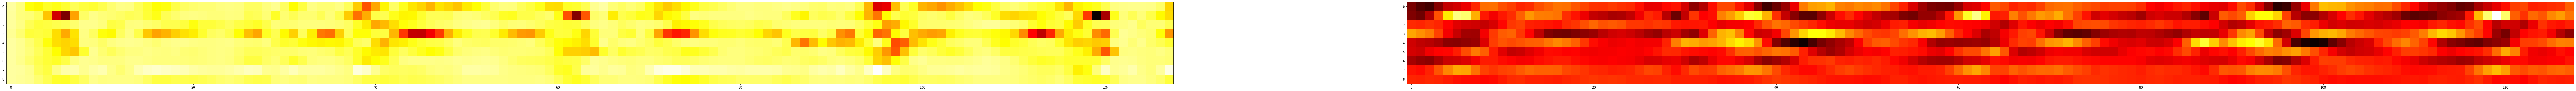

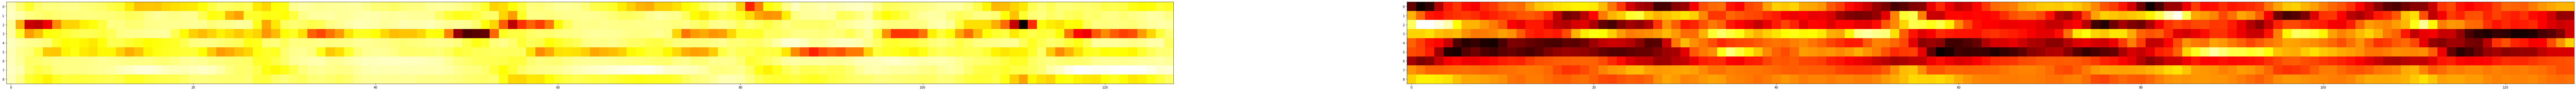

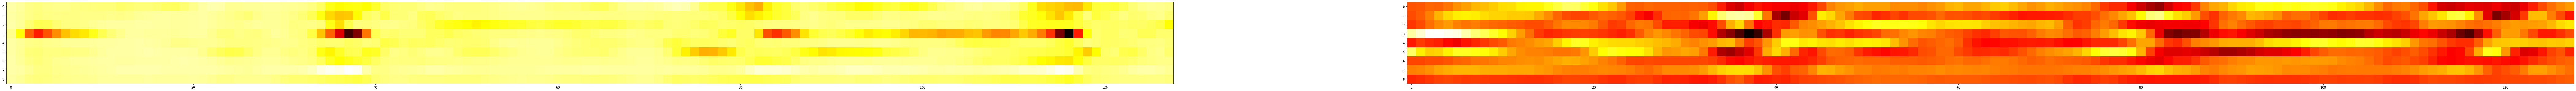

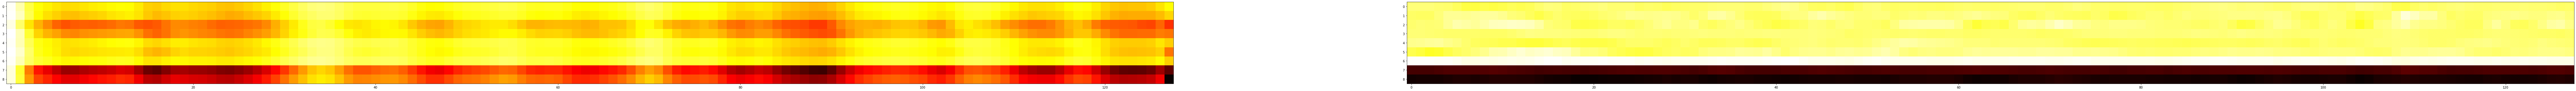

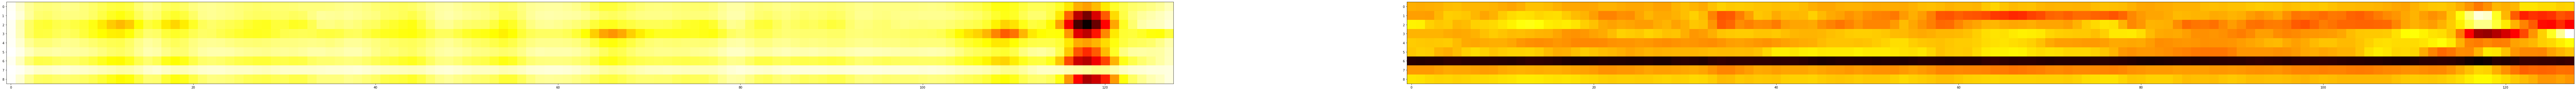

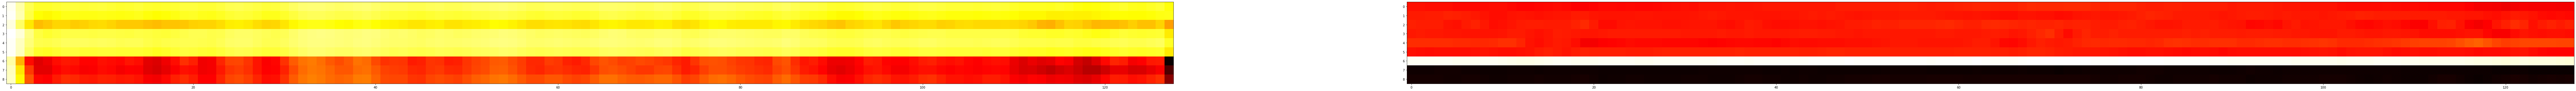

In [119]:
for i in range(6):
    plt.figure(figsize=(150,150))
    plt.subplot(1, 2, 1)
    plt.imshow(np.transpose(imgs[i]), cmap='hot_r')
    plt.subplot(1, 2, 2)
    plt.imshow(np.transpose(sample_imgs[i]), cmap='hot_r')

In [120]:
print(sample_imgs.shape)

(6, 128, 9)


In [121]:
print(imgs.shape)

(6, 128, 9)


In [122]:
print(X_tr.shape)

(5514, 128, 9)


In [123]:
print(y_tr.shape)

(5514, 6)


In [124]:
print(X)

Tensor("inputs:0", shape=(None, 128, 9), dtype=float32)


In [125]:
Rs

[<tf.Tensor 'Taylor_24/sub_3:0' shape=(None, 128, 9) dtype=float32>,
 <tf.Tensor 'Taylor_25/sub_3:0' shape=(None, 128, 9) dtype=float32>,
 <tf.Tensor 'Taylor_26/sub_3:0' shape=(None, 128, 9) dtype=float32>,
 <tf.Tensor 'Taylor_27/sub_3:0' shape=(None, 128, 9) dtype=float32>,
 <tf.Tensor 'Taylor_28/sub_3:0' shape=(None, 128, 9) dtype=float32>,
 <tf.Tensor 'Taylor_29/sub_3:0' shape=(None, 128, 9) dtype=float32>]